In [1]:
# Set up autoreload of external .py files
%reload_ext autoreload
%autoreload 2

# Setup tensorboard session

%load_ext tensorboard

# Import dependencies

from dataloader import DataLoader
from datadownloader import download_url
from model import ColorizationModel
import tensorflow as tf
import random

In [2]:
# Download and unzip datasets

download_url('http://data.csail.mit.edu/places/places365/test_256.tar', 'train')
download_url('http://data.csail.mit.edu/places/places365/val_256.tar', 'val')

train.tar already exists, skipping downloading.
train.tar already untarred, skipping untarring.
val.tar already exists, skipping downloading.
val.tar already untarred, skipping untarring.


In [3]:
# Initialize the train_data and val_data sequence data loaders

train_data = DataLoader('../Dataset/train')
val_data = DataLoader('../Dataset/val')

In [4]:
# Initialize the model

model = ColorizationModel(train_data, val_data)

In [8]:
# Train the model
# Change the second input depending on current epoch (resume training)

model.train_model(250, 0)

Epoch 1/250
2566/2566 [==============================] - 2463s 958ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 2/250
2566/2566 [==============================] - 2539s 990ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 3/250
2566/2566 [==============================] - 2693s 1s/step - loss: 0.0329 - mean_absolute_error: 0.0329 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326
Epoch 4/250
2566/2566 [==============================] - 2745s 1s/step - loss: 0.0325 - mean_absolute_error: 0.0325 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 5/250
2566/2566 [==============================] - 2746s 1s/step - loss: 0.0322 - mean_absolute_error: 0.0322 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 6/250
2566/2566 [==============================] - 2960s 1s/step - loss: 0.0319 - mean_absolute_error: 0.0319 - val_loss: 0.0316 - val_mean_abs

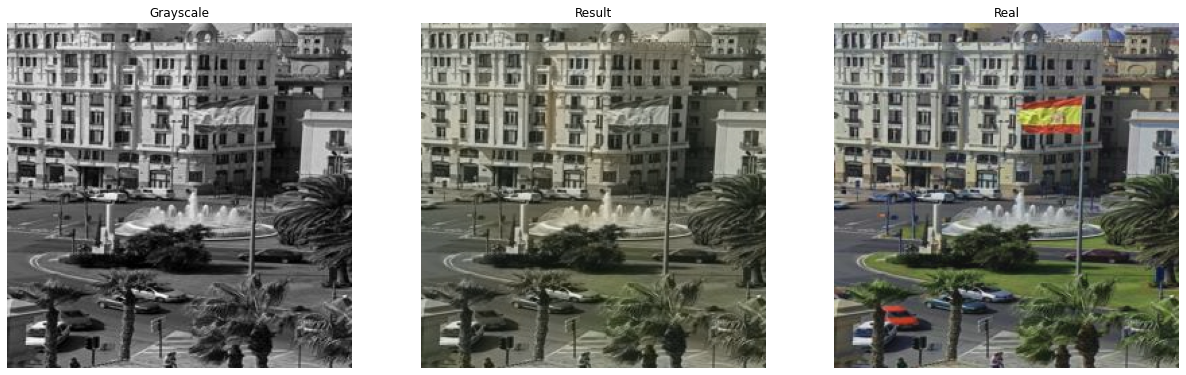

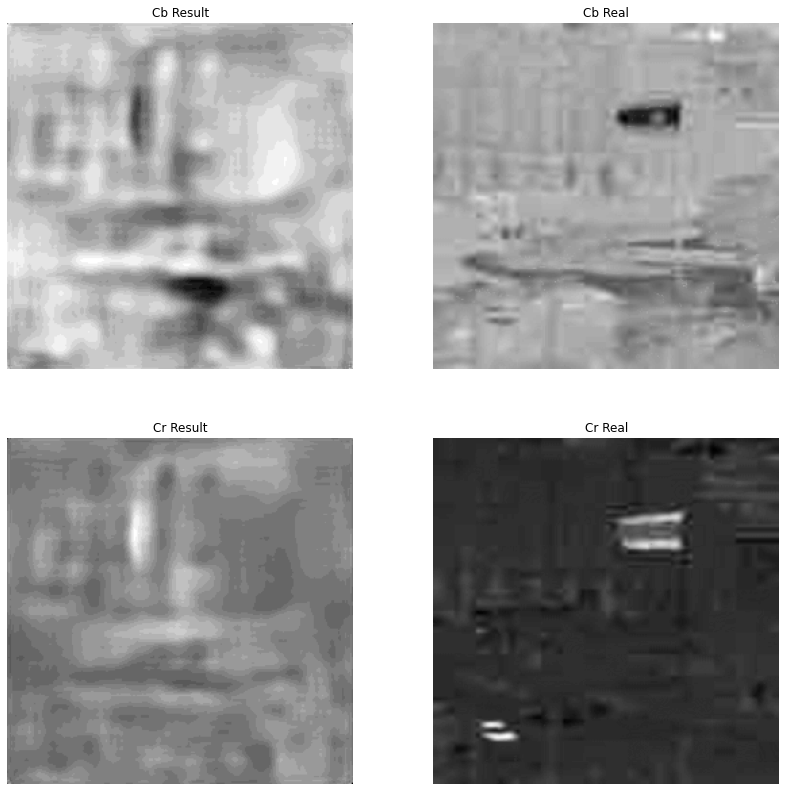

In [16]:
# Test a random validation image
model.load_weights('../checkpoints/bestweights.hdf5')
model.test_image(random.choice(val_data.im_paths))

In [ ]:
# Tells you if you have a GPU available for training

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))